# Energies of the Quantum Harmonic Oscillator 
## Safwan Ahmed 22006797

For a Quantum Harmonic Oscillator (QHO), we can investigate its wavefunction and find the energy of it. Should we do that we will encounter the Hamiltonian, which is given by:
$$ \hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2} k x^2 $$ 

where $$ $$ $k$ represents the spring constant in potential energy $x$ represents the position operator. $$ $$
In this notebook, we will be plotting this wavefunction, its derivative, and using them to calculate the kinetic and potential energies of the Hamiltonian by integration.

In [3]:
# Import relavent modules and libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt # maybey scipy later

### The wavefunction and its derivative

The wavefunction for our QHO is given by: $$ \psi(x) = (2\alpha / \pi)^{1/4}e^{-\alpha x ^ {2}} $$
$$ $$ where $$ $$ 
$\alpha$ is a constant.

To determine its 2nd derivative, we will be using the forward difference method twice. This involves finding the value of each point of a function, with points spacing being dx, and using the formula: $$ f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
 $$

For our value of dx, I chose 0.001. The range which we are integrating between is -5 and 5. Calculating 0.001 / 10 gives 0.0001 or 0.01% as a percentage of the total range. This in turn gives us a fairly accurate approximation whilst making sure the number of computations isn't too big (which would be between the ranges of 10 ^ 5 to 10 ^ 6). 

In [4]:
dx = 0.001 
x = np.arange(-5,5+dx, dx) # run tests after
alpha = 1.0 
psi = ((2 * alpha / np.pi)** 0.25) * np.exp(-alpha * x ** 2 ) # wavefunction

In [5]:
def d2f(f,dx):
    """
    Takes values of a function and returns the second derivative values of the function
    Note: First 2 elements of the 'should-be' resulting array will be removed, giving an array that is 2 elements shorter than
    what was input. It's suggested to use a reasonably small dx size to reduce this inaccuracy.
    Input: Array of function values, dx 
    Output: Values of the second derivative of the function
    """
    df_dx = (np.roll(f, -1) - f)/dx # first derivative, np roll shifts all elements to the left, effectively acting as a +dx
    d2f_dx2 = (np.roll(df_dx, -1) - df_dx)/dx # second derivative
    
    return d2f_dx2[2:] # remove first 2 elements 

Note: Due to the nature of np.roll, the first 2 elements were going to be incorrect. This would result in a spike at the beginning of the graph that would have no physical meaning and be present only due to an error in my code. One option to solve this is by removing the first 2 elements from the array. This would create an array that is shorter than inputted. However, as this is mentioned to the user and the user uses a reasonably small dx size, this shouldn't make a significant difference to the resulting plot. 

<IPython.core.display.Javascript object>


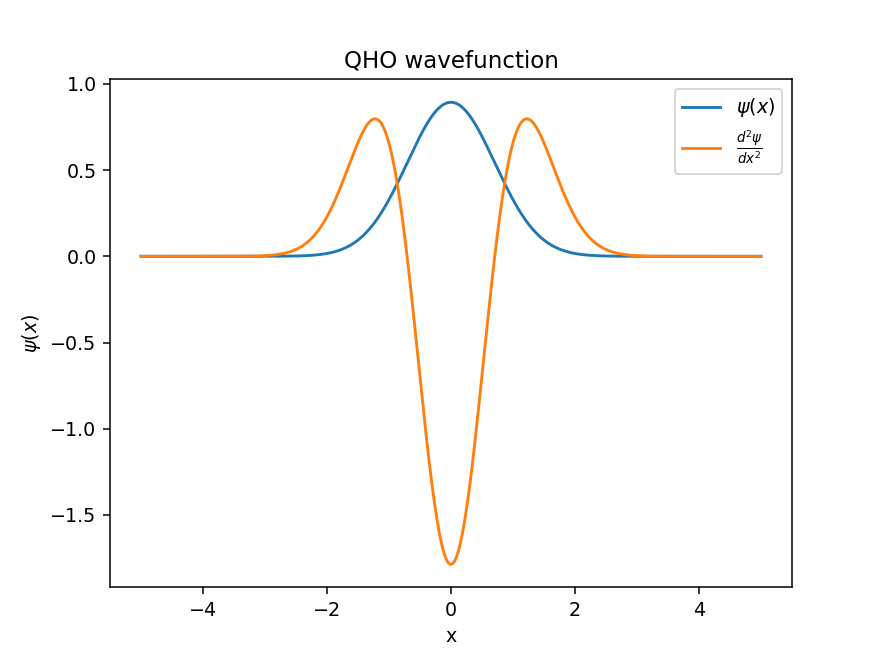

In [6]:
# Calculate d2psi
d2_psi = d2f(psi, dx) 
# Plot and titles, axis and legend
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1) # Using sublot method to prevent graphs from upcoming cells interfering with this graph 
ax.plot(x, psi, label = '$\psi(x)$')
ax.plot(x[2:], d2_psi, label = r"$\frac{d^2\psi}{dx^2}$") # remove first 2 elements of psi since d2_psi is 2 elements shorter
ax.set_xlabel('x')
ax.set_ylabel(r'$\psi(x)$')
ax.set_title('QHO wavefunction')
ax.legend();

### Evaluating the energies using integration 

The kinetic and potential energies of the Hamiltonian is given by:

$$ E_{KE} = -\frac{1}{2}\int dx\psi(x)\frac{d^2\psi}{dx^2} $$ and  $$ E_{PE} = \frac{1}{2}\int dx\psi(x)x^{2}\psi(x)   $$

where $\psi(x)$ is the wavefunction satisfying the QHO. 

We will first plot the above functions without the integrals to see how they look like and then use tools from scipy libary to integrate them from -5 to 5 using the simpson method. 

<IPython.core.display.Javascript object>


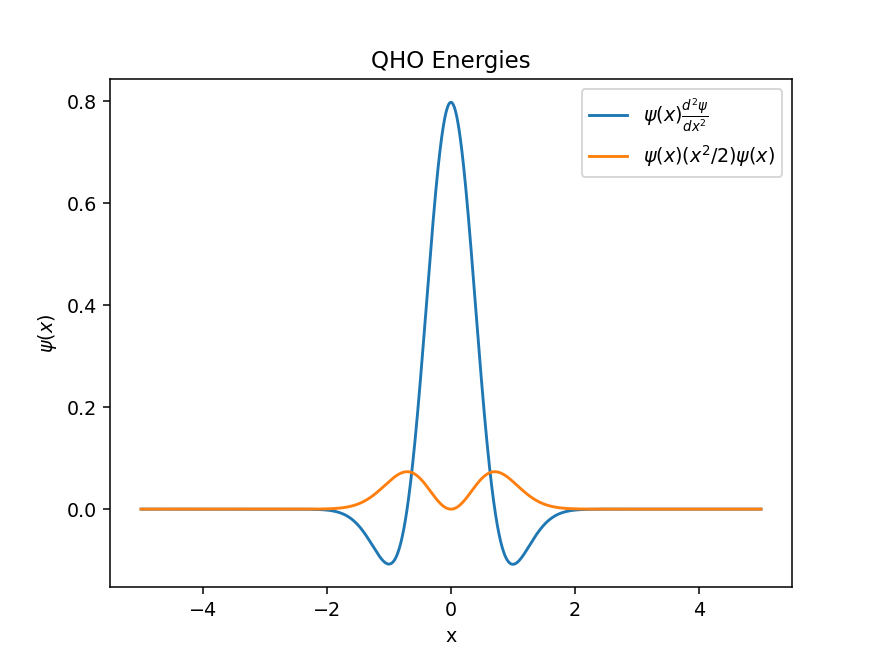

In [7]:
# Calculate psi*d2psi and psi*(0.5*x*x)*psi
psi_d2psi = (-1/2) * psi[2:] * d2_psi # remove first 2 elements of psi since d2_psi is 2 elements shorter 
psi_x2_psi = psi*(0.5*x*x)*psi
# Plot psi*d2psi and psi*(0.5*x*x)*psi
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
ax.plot(x[2:], psi_d2psi, label = '$\psi(x)\\frac{d^2\psi}{dx^2}$') # remove first 2 elements of x
ax.plot(x, psi_x2_psi, label = r"$\psi(x)(x^2/2)\psi(x)$")
ax.set_xlabel('x')
ax.set_ylabel(r'$\psi(x)$')
ax.set_title('QHO Energies')
ax.legend();

In [13]:
from scipy import integrate # Import from scipy library

KE = integrate.simps(psi_d2psi, x[2:])# Calculate KE 
PE = integrate.simps(psi_x2_psi, x) # Calculate PE 

print(f'The kinetic energy is {KE} J')
print(f'The potential energy is {PE} J')

The kinetic energy is 0.49999912500097976 J
The potential energy is 0.125 J


### Conclusion

The kinetic energy is 4 times the potential energy. From the graphs above, this seems reasonable as the blue line, whose area represents kinetic energy, has an area about four times the orange line, whose area represents potential energy, even considering the negative contributions. 

As we notice, the kinetic energy isn't exact but very close to 0.5 as it involves using the derivative function which is an approximation. Decreasing our dx size makes the kinetic energy closer to the exact value, however, a dx size of 0.001 does a sufficient job of making the value accurate whilst not being too computationally expensive.  